In [1]:
import pandas as pd
pd.set_option ('display.max_columns', 85)
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

In [2]:
train = pd.read_csv ("H:/****/train_data_200k.csv")
test = pd.read_csv ("H:/****/test_data_100k.csv")

## Для начала ознакомимся с данными

In [3]:
train.head()

,Unnamed: 0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,tag22,tag23,tag24,tag25,tag26,tag27,tag28,tag29,tag30,tag31,tag32,tag33,tag34,tag35,tag36,tag37,tag38,tag39,tag40,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50,tag51,tag52,tag53,tag54,tag55,tag56,tag57,tag58,tag59,tag60,tag61,tag62,tag63,tag64,tag65,tag66,tag67,tag68,tag69,tag70,tag71,tag72,tag73,tag74,tag75,tag76,tag77,tag78,tag79,target1,target2,target3,target4
0,2016-08-18 00:00:00,15.78042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.30402,60.01311,-0.001269,0.018163,-0.000183,0.000671,0.000956,0.000858,0.000992,NaN,19.26714,22.33068,15.60123,80.97660,22.33527,33.87122,24.00339,57.06384,44.54309,23.80796,27.63220,47.27997,23.96099,23.94522,26.39192,47.87158,37.12356,36.37045,NaN,67.60985,NaN,NaN,19.70473,164.9857,NaN,NaN,NaN,183.3191,206.6534,69.99840,NaN,NaN,50.50632,46.30415,61.20765,72.77773,25.30402,60.01311,2.373747,0.677581,2.775156,1.769055,2.766034,2.794747,33.42513,34.27024,39.65590,44.48986,50.34106,37.34515,53.65030,50.70506,61.08673,72.76518,53.02723,66.30531,55.10297,73.65612,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-08-18 00:01:00,15.80157,NaN,NaN,NaN,NaN,NaN,53.06440,NaN,NaN,25.30464,60.01566,-0.001289,0.018208,-0.000210,0.000670,0.000947,0.000857,0.001003,25.31277,19.26205,22.35979,15.61021,80.98914,22.33696,33.89564,23.99264,57.05022,44.49367,23.81503,27.63496,47.27994,23.97050,23.93777,26.40619,47.86334,37.09820,36.26917,NaN,NaN,NaN,NaN,19.77348,164.1665,NaN,NaN,NaN,185.1547,205.3378,69.98409,NaN,NaN,50.49541,46.20826,61.20348,72.76062,25.30464,60.01566,2.373543,0.677852,2.775152,1.769295,2.766190,2.794963,33.41073,34.25732,39.70995,44.46941,50.31259,37.34732,53.65897,50.60955,61.09685,72.76947,53.05109,66.30098,55.11534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-08-18 00:02:00,15.68913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.30486,60.01267,-0.001310,0.018185,-0.000146,0.000663,0.000957,0.000855,0.001004,NaN,19.26793,22.38500,15.59624,80.94573,22.33768,33.91651,23.98789,57.04745,44.52599,23.81206,27.63683,47.24675,23.96895,23.92040,26.36558,47.87779,37.10657,36.28939,91.98822,67.92857,NaN,NaN,19.77574,166.6839,NaN,NaN,NaN,185.7857,206.4609,70.04832,NaN,NaN,50.49607,46.24781,61.20309,72.76160,25.30486,60.01267,2.373388,0.677734,2.775619,1.768982,2.766650,2.795123,33.41452,34.23959,39.74942,44.45711,50.31557,37.32831,53.66189,50.60200,61.05627,72.75539,53.06495,66.30359,55.09395,NaN,NaN,55.07365,NaN,NaN,NaN,NaN
3,2016-08-18 00:03:00,15.75101,NaN,20.26209,NaN,NaN,NaN,52.95166,NaN,NaN,25.30544,60.01596,-0.000885,0.018180,-0.000192,0.000672,0.000949,0.000864,0.001003,NaN,19.24153,22.34216,15.60701,80.93867,22.33434,33.98246,23.98795,57.05103,44.51584,23.80859,27.62737,47.26019,23.94341,23.91153,26.39959,47.91307,37.14546,36.27222,NaN,NaN,37.1847,NaN,19.80556,163.1378,NaN,NaN,NaN,182.6789,207.5279,69.95206,37.13296,NaN,50.51320,46.13975,61.28067,72.77470,25.30544,60.01596,2.385501,0.678970,2.775364,1.769024,2.766515,2.795122,33.40705,34.23381,39.79846,44.47630,50.28574,37.30737,53.67104,50.68343,61.00186,72.77387,53.06760,66.28421,55.12513,NaN,92.46913,NaN,NaN,NaN,NaN,NaN
4,2016-08-18 00:04:00,15.57773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.30540,60.01478,-0.001005,0.018167,-0.000113,0.000678,0.000955,0.000865,0.001013,NaN,19.25176,22.33690,15.60543,80.97723,22.33530,34.05027,23.98389,57.05997,44.51775,23.76636,27.64237,47.20809,23.93508,23.90270,26.37914,47.93106,37.13568,36.26667,NaN,NaN,NaN,NaN,19.79632,166.8106,NaN,NaN,NaN,186.6251,NaN,69.99007,NaN,NaN,50.50373,46.33209,61.28010,72.72731,25.30540,60.01478,2.385056,0.678937,2.775762,1.769598,2.766815,2.795541,33.37688,34.22705,39.81411,44.48069,50.23417,37.30698,53.58812,50.64983,61.04366,72.72121,53.09679,66.26472,55.15526,73.67016,NaN,NaN,NaN,NaN,NaN,NaN


#### столбец unnamed:0 считаю неинформативным в данной задаче

In [4]:
train.drop(axis=1, columns="Unnamed: 0", inplace=True)

<b> на лицо сразу пропуски таргетов и пропуски тэгов. изучим детальнее

In [5]:
train.dropna(subset=['target1', 'target2', 'target3', 'target4'], 
             inplace=True)

In [6]:
train.duplicated().sum()

0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 9 to 199999
Data columns (total 83 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tag1     199925 non-null  float64
 1   tag2     109370 non-null  float64
 2   tag3     109455 non-null  float64
 3   tag4     85 non-null      float64
 4   tag5     9736 non-null    float64
 5   tag6     373 non-null     float64
 6   tag7     88119 non-null   float64
 7   tag8     16776 non-null   float64
 8   tag9     407 non-null     float64
 9   tag10    199828 non-null  float64
 10  tag11    199858 non-null  float64
 11  tag12    199866 non-null  float64
 12  tag13    199866 non-null  float64
 13  tag14    199866 non-null  float64
 14  tag15    199866 non-null  float64
 15  tag16    199866 non-null  float64
 16  tag17    199866 non-null  float64
 17  tag18    199866 non-null  float64
 18  tag19    100167 non-null  float64
 19  tag20    199858 non-null  float64
 20  tag21    199858 non-null  

In [8]:
train.describe()

,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,tag22,tag23,tag24,tag25,tag26,tag27,tag28,tag29,tag30,tag31,tag32,tag33,tag34,tag35,tag36,tag37,tag38,tag39,tag40,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50,tag51,tag52,tag53,tag54,tag55,tag56,tag57,tag58,tag59,tag60,tag61,tag62,tag63,tag64,tag65,tag66,tag67,tag68,tag69,tag70,tag71,tag72,tag73,tag74,tag75,tag76,tag77,tag78,tag79,target1,target2,target3,target4
count,1.999250e+05,109370.000000,109455.000000,85.000000,9736.000000,373.000000,88119.000000,16776.000000,407.000000,199828.000000,199858.000000,199866.000000,199866.000000,199866.000000,199866.000000,199866.000000,199866.000000,199866.000000,100167.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,39211.000000,38039.000000,1.583050e+05,152967.000000,15577.000000,1407.000000,1.998540e+05,199858.000000,1.117250e+05,1.137990e+05,98410.0,1.998580e+05,132348.000000,199857.000000,78118.000000,14722.000000,101783.000000,84180.000000,59434.000000,199858.000000,199828.000000,199858.000000,199828.000000,199110.000000,199866.000000,35801.000000,36717.000000,199866.000000,199858.000000,199858.000000,199858.000000,199858.000000,199858.000000,37643.000000,199858.000000,199858.000000,199858.000000,35078.000000,199858.000000,199858.000000,199858.000000,48800.000000,48671.000000,48556.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,1.471743e+01,0.003483,12.696510,9.101270,31.654650,68.328355,47.680528,46.703767,71.668521,23.584795,50.128483,-0.000334,0.009145,-0.001012,0.000952,0.000641,0.000594,0.001458,20.305678,11.696258,13.797456,11.759574,81.016137,19.222727,8.781130,10.877555,20.159194,17.092142,25.379754,26.202312,20.608588,5.373904,19.468793,10.679408,23.354119,35.503333,34.075275,7.990182e+01,59.421410,40.916429,9.436213,1.297048e+01,156.896647,1.761049e+01,1.316797e+00,0.0,1.848092e+02,245.339886,69.513149,43.838023,45.891781,46.728229,46.626295,59.817780,72.659998,23.584795,50.128483,2.415535,0.716385,2.769036,1.769548,2.763236,2.793360,20.815871,26.054637,28.467251,43.801555,38.094823,35.714575,43.458810,50.051772,56.015884,72.578654,41.898317,66.520657,53.966083,75.459034,94.800861,55.872270,0.001156,0.049836,0.942428,0.006580
std,1.873459e+00,0.017229,4.285814,9.667475,5.039073,13.580792,4.506614,3.941020,0.606023,4.878017,16.948380,0.002746,0.006391,0.000964,0.000167,0.000156,0.000138,0.000478,4.028247,6.351685,6.972926,5.400740,0.562175,13.288338,19.251339,9.765429,29.312091,23.205313,15.660610,11.451441,25.272415,14.370587,9.534798,15.769532,21.636081,3.705217,4.235426,5.119239e+00,3.839736,2.699629,1.713587,3.676823e+00,6.473582,3.041737e+00,9.415571e-01,0.0,6.731854e+00,18.388015,4.450014,3.705094,3.696100,3.468786,2.981754,3.228036,0.214573,4.878017,16.948380,0.186907,0.179989,0.036395,0.003708,0.008499,0.007465,11.133272,3.790377,7.818345,1.117667,8.392553,3.534797,7.486813,1.536722,4.041277,0.235189,7.772389,0.392995,1.512345,0.872864,2.888836,1.450327,0.000085,0.003685,0.003936,0.001442
min,2.215690e-08,-0.005142,0.008831,-3.354573,15.898870,10.271640,22.730830,24.820300,69.825200,8.848302,-0.050376,-0.030081,-0.003332,-0.002694,0.000252,0.000161,0.000170,0.000683,0.000000,-10.558860,-9.543885,-19.495170,68.816150,-7.698016,-34.570690,-14.961360,-34.654410,-30.909190,-4.582263,2.232100,-29.993390,-37.930990,-6.355927,-34.072190,-21.258420,18.954950,15.042280,6.259399e-07,0.020922,20.059580,-4.966894,2.230997e-22,96.788590,2.313189e-25,2.303353e-25,0.0,6.076754e-19,0.000218,19.210710,22.781390,28.341410,24.284860,27.575620,37.753350,67.914190,8.848302,-0.050376,1.947665,-0.000511,0.000097,1.703969,2.574159,2.599954,0.000000,15.118610,-4.038994,33.356780,18.640790,18.862820,23.278410,40.573780,43.124100,67.901700,23.078610,62.552550,44.

array([[<AxesSubplot:title={'center':'tag1'}>,
        <AxesSubplot:title={'center':'tag2'}>,
        <AxesSubplot:title={'center':'tag3'}>,
        <AxesSubplot:title={'center':'tag4'}>,
        <AxesSubplot:title={'center':'tag5'}>,
        <AxesSubplot:title={'center':'tag6'}>,
        <AxesSubplot:title={'center':'tag7'}>,
        <AxesSubplot:title={'center':'tag8'}>,
        <AxesSubplot:title={'center':'tag9'}>],
       [<AxesSubplot:title={'center':'tag10'}>,
        <AxesSubplot:title={'center':'tag11'}>,
        <AxesSubplot:title={'center':'tag12'}>,
        <AxesSubplot:title={'center':'tag13'}>,
        <AxesSubplot:title={'center':'tag14'}>,
        <AxesSubplot:title={'center':'tag15'}>,
        <AxesSubplot:title={'center':'tag16'}>,
        <AxesSubplot:title={'center':'tag17'}>,
        <AxesSubplot:title={'center':'tag18'}>],
       [<AxesSubplot:title={'center':'tag19'}>,
        <AxesSubplot:title={'center':'tag20'}>,
        <AxesSubplot:title={'center':'tag21'}>,

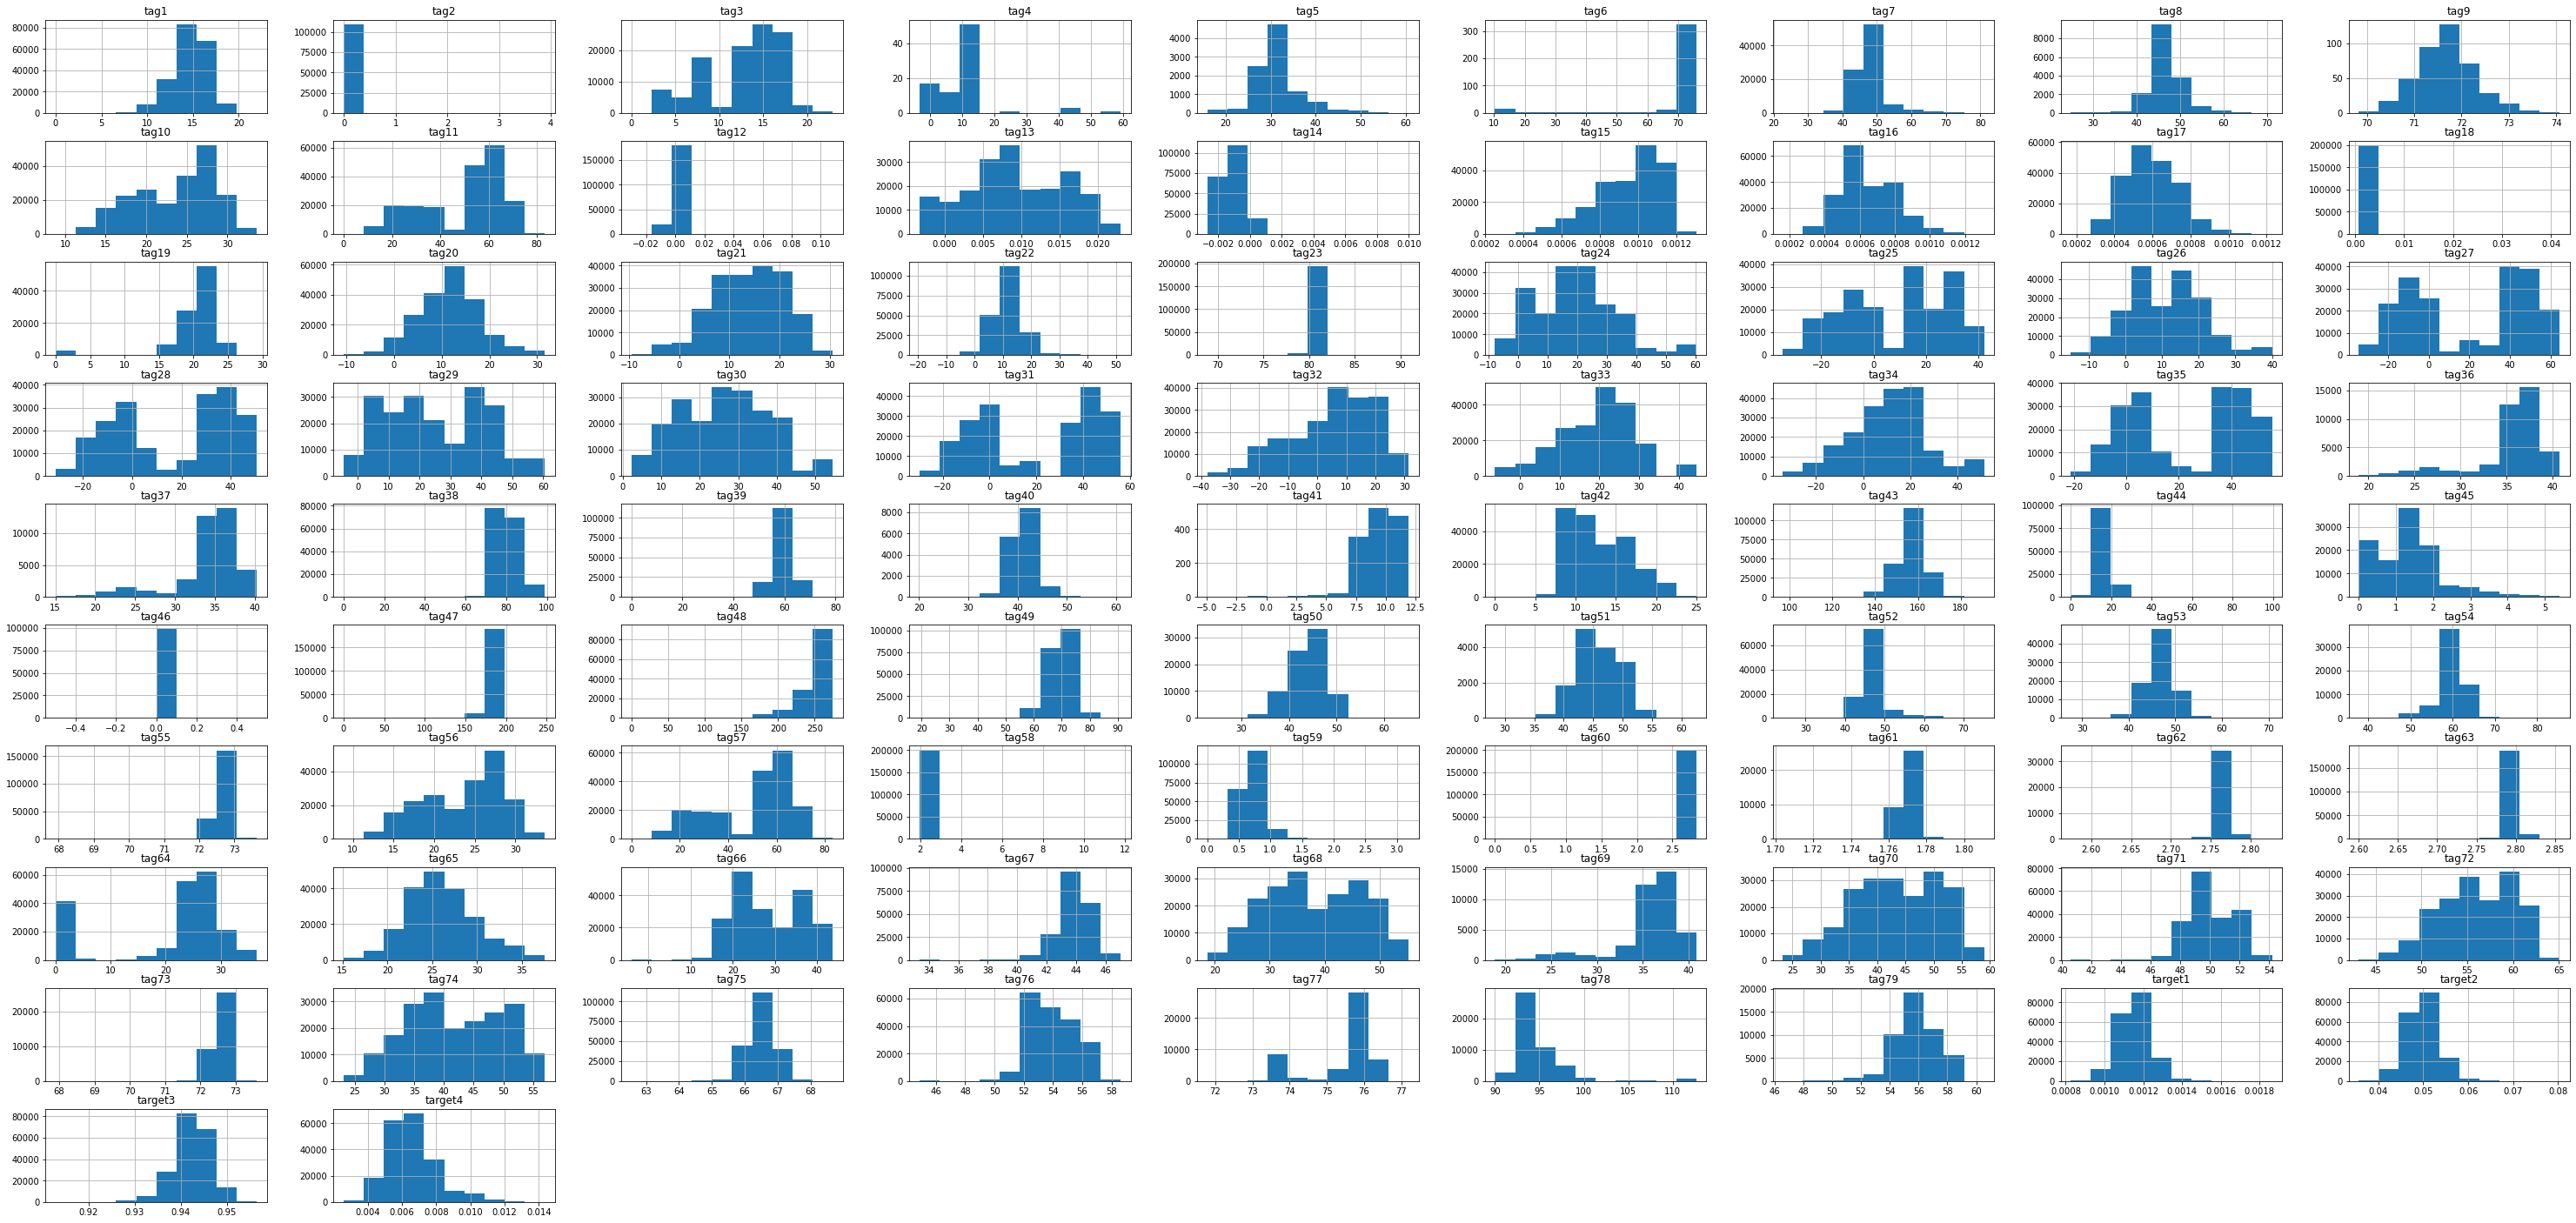

In [9]:
train.hist(figsize=(52,25))

<b>Замеченные аномалии:   
tag6 - одинокий пенек в области значений от 10 до 17;  
tag19 - одинокий пенек в области значений от 1 до 3;  
tag33 - так же одинокий пенек в районе 39-45;  
tag41 - одинокий пенек минусовых значений;  
tag78 - одинокий пенек значений от 111+, подозрительный пенек от 103-107.  </b>  
Так как природу происхождения данных я не знаю, то буду считать, что замеченные аномалии - выбросы. Пласты с очень маленьким колличеством значений оставляем по той же причине, что природа данных неизвестна.

In [10]:
def clean_data (column, start, stop):
    delete = train[(train[column] > start) \
                   & (train[column] < stop)].index
    train.drop(delete, inplace=True)
    display(delete)

In [11]:
clean_data('tag6', 0, 20)

Int64Index([42322, 42333, 42356, 42415, 42465, 42485, 42537, 42581, 42621,
            42706, 42858, 43315, 44438, 44442, 45576],
           dtype='int64')

In [12]:
clean_data('tag19', 1, 5)

Int64Index([106446, 106447, 106448, 106449, 106450, 106451, 106452, 106453,
            106454, 106455,
            ...
            108200, 108201, 108202, 108203, 108204, 108205, 108206, 108207,
            108208, 109424],
           dtype='int64', length=200)

In [13]:
clean_data('tag33', 35, 50)

Int64Index([42833, 42834, 42835, 42836, 42837, 42838, 42839, 42840, 42841,
            42842,
            ...
            49430, 49431, 49432, 49433, 49434, 49435, 49436, 49437, 49438,
            49439],
           dtype='int64', length=6602)

In [14]:
clean_data('tag41', -3, 1)

Int64Index([76874, 76878, 76879, 76880, 77383, 77384, 77387], dtype='int64')

In [15]:
clean_data('tag78', 110, 120)

Int64Index([179458, 179462, 179466, 179470, 179474, 179478, 179482, 179486,
            179490, 179494,
            ...
            182436, 182440, 182444, 182448, 182452, 182456, 182460, 182465,
            182469, 182473],
           dtype='int64', length=734)

<b> Удалять все пропуски не буду, т.к. есть столбец "tag4", где всего 82 не пропущенных значения. Предлагаю заполнить пропуски нулям, для регрессии они не будут нести информации и мы не потеряем почти все данные из-за этого столбца

In [16]:
train.fillna(0, inplace=True)

#### Посмотрим,, получится ли уменьшить размерность пространства признаков методом РСА

In [17]:
X_train = train.iloc[:, : 79]

In [18]:
pca_test = PCA(n_components=79)
pca_test.fit(X_train)

PCA(n_components=79)

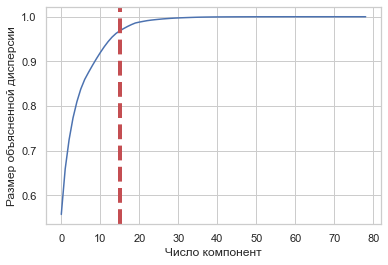

None

,Размер объясненной дисперсии,Вклад каждой компоненты
0,0.557514,0.557514
1,0.659228,0.101713
2,0.724825,0.065597
3,0.773408,0.048583
4,0.809757,0.036350
5,0.838252,0.028495
6,0.859685,0.021433
7,0.875861,0.016176
8,0.891287,0.015426
9,0.906003,0.014716


In [19]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Число компонент')
plt.ylabel('Размер объясненной дисперсии')
plt.axvline(linewidth=4, 
            color='r', 
            linestyle = '--', 
            x=15, 
            ymin=0, 
            ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Размер объясненной дисперсии'] = cvr
pca_df['Вклад каждой компоненты'] = evr

display(pca_df.head(15))

<b> 15 признаков описывают 96% дисперсии, остальные отброшу

## Переходим к построению модели

In [20]:
X = train.iloc[:, : 79]
y = train.iloc[:, 79 :]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA(n_components=15)
X_scaled_pca = pca.fit_transform(X_scaled)

<b> Так как значения имеют большой разброс, то предлагаю стандартизировать входные данные

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

#### DummyRegressor

In [24]:
dummy = MultiOutputRegressor(DummyRegressor(strategy='median')).fit(X_train, y_train)

In [25]:
ypred = dummy.predict(X_test)
print("y1 RMSE:%.4f" % mean_squared_error(y_test[['target1']], ypred[:,0])**0.5)
print("y2 RMSE:%.4f" % mean_squared_error(y_test['target2'], ypred[:,1])**0.5)
print("y3 RMSE:%.4f" % mean_squared_error(y_test['target3'], ypred[:,2])**0.5)
print("y4 RMSE:%.4f" % mean_squared_error(y_test['target4'], ypred[:,3])**0.5)

y1 RMSE:0.0001
y2 RMSE:0.0037
y3 RMSE:0.0039
y4 RMSE:0.0014


#### CatBoost

In [26]:
cat = CatBoostRegressor (iterations=100, 
                         random_state=42, 
                         loss_function='MultiRMSE')

In [27]:
cat.fit(X_train, y_train)

0:	learn: 0.0055512	total: 86ms	remaining: 8.51s
1:	learn: 0.0054980	total: 115ms	remaining: 5.66s
2:	learn: 0.0054481	total: 144ms	remaining: 4.67s
3:	learn: 0.0053996	total: 175ms	remaining: 4.2s
4:	learn: 0.0053545	total: 203ms	remaining: 3.87s
5:	learn: 0.0053097	total: 234ms	remaining: 3.67s
6:	learn: 0.0052661	total: 267ms	remaining: 3.55s
7:	learn: 0.0052266	total: 294ms	remaining: 3.39s
8:	learn: 0.0051876	total: 327ms	remaining: 3.3s
9:	learn: 0.0051503	total: 358ms	remaining: 3.22s
10:	learn: 0.0051131	total: 386ms	remaining: 3.12s
11:	learn: 0.0050790	total: 414ms	remaining: 3.04s
12:	learn: 0.0050461	total: 445ms	remaining: 2.98s
13:	learn: 0.0050137	total: 475ms	remaining: 2.92s
14:	learn: 0.0049837	total: 506ms	remaining: 2.87s
15:	learn: 0.0049535	total: 537ms	remaining: 2.82s
16:	learn: 0.0049251	total: 566ms	remaining: 2.76s
17:	learn: 0.0048977	total: 596ms	remaining: 2.72s
18:	learn: 0.0048712	total: 628ms	remaining: 2.68s
19:	learn: 0.0048469	total: 656ms	remaining:

In [28]:
pred = cat.predict(X_test)

In [29]:
print("y1 RMSE:%.4f" % mean_squared_error(y_test[['target1']], pred[:,0])**0.5)
print("y2 RMSE:%.4f" % mean_squared_error(y_test['target2'], pred[:,1])**0.5)
print("y3 RMSE:%.4f" % mean_squared_error(y_test['target3'], pred[:,2])**0.5)
print("y4 RMSE:%.4f" % mean_squared_error(y_test['target4'], pred[:,3])**0.5)

y1 RMSE:0.0001
y2 RMSE:0.0027
y3 RMSE:0.0029
y4 RMSE:0.0010


In [30]:
print("R^2 =", cat.score(X_test, y_test))

R^2 = 0.4675967389036113


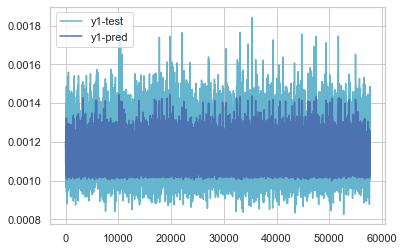

In [31]:
x_ax = range(len(X_test))
plt.plot(x_ax, 
         y_test['target1'], 
         label="y1-test", 
         color='c')
plt.plot(x_ax, 
         pred[:,0], 
         label="y1-pred", 
         color='b')
plt.legend()
plt.show()

<b> Вывод: даже предсказывая таргеты медианным значением по всему датасету получаем очень высокую точность.  
    На примере CatBoostRegressor была построена предсказательная модель, которая так же имеет крайне высокий скор на валидационной выборке.

## Сохраняем DataFrame с предсказаниями

In [32]:
test.fillna(0, inplace=True)

In [33]:
test.drop(axis=1, columns="Unnamed: 0", inplace=True)

In [34]:
predict = cat.predict(test)

In [35]:
predictions = pd.DataFrame()

In [36]:
predictions['predict1'] = predict[:,0]
predictions['predict2'] = predict[:,1]
predictions['predict3'] = predict[:,2]
predictions['predict4'] = predict[:,3]

In [37]:
predictions.to_csv ('H:\ChemTechAi\predictions.csv', index=False)

## Отбор топ-10 фичей

https://github.com/WillKoehrsen/feature-selector

In [38]:
from feature_selector import FeatureSelector

In [39]:
X_train = train.iloc[:, : 79]
y_train = train.iloc[:, 82]

In [40]:
fs = FeatureSelector(data = X_train, labels = y_train)

In [41]:
%%time
fs.identify_zero_importance(task = 'regression',
                            n_iterations=50,
                           early_stopping=False)

Training Gradient Boosting Model


6 features with zero importance after one-hot encoding.

Wall time: 5min 38s


In [42]:
fs.identify_low_importance(cumulative_importance = 0.99)

59 features required for cumulative importance of 0.99 after one hot encoding.
20 features do not contribute to cumulative importance of 0.99.



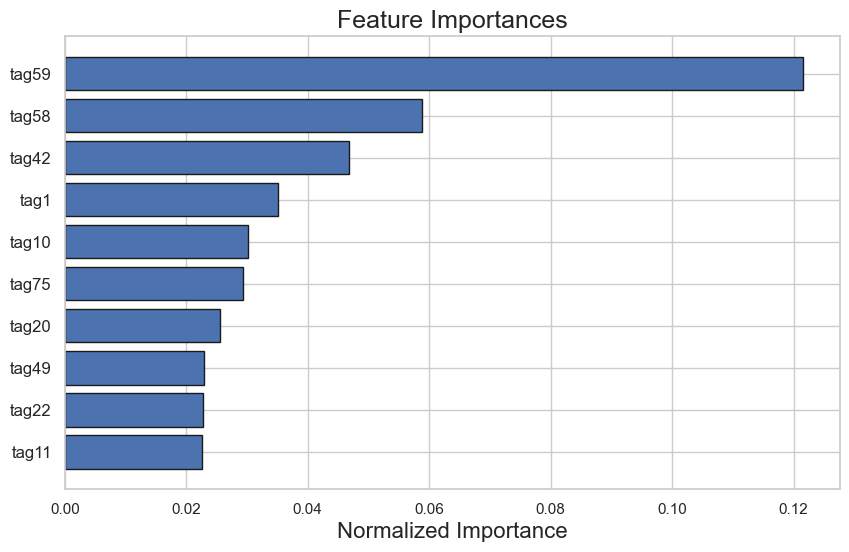

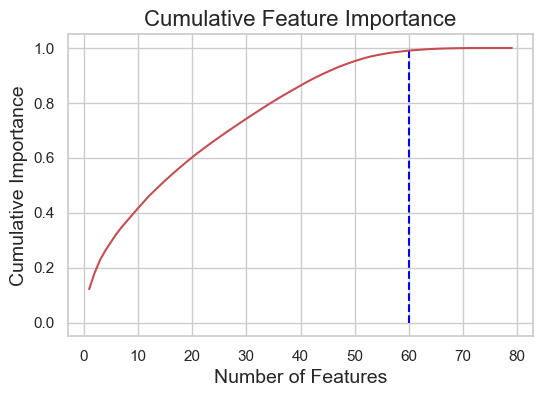

60 features required for 0.99 of cumulative importance


In [43]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 10)

In [44]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,tag59,3646.0,0.121533,0.121533
1,tag58,1765.0,0.058833,0.180367
2,tag42,1405.0,0.046833,0.227200
3,tag1,1054.0,0.035133,0.262333
4,tag10,905.0,0.030167,0.292500
5,tag75,882.0,0.029400,0.321900
6,tag20,767.0,0.025567,0.347467
7,tag49,689.0,0.022967,0.370433
8,tag22,685.0,0.022833,0.393267
9,tag11,680.0,0.022667,0.415933


In [45]:
top_10_feature_importance = fs.feature_importances.head(10)

In [46]:
top_10_feature_importance.to_csv ('H:/****/top_10_feature_importance.csv', index=False)